# heart_disease adsgan stacking

Training on heart_disease dataset using adsgan model and stacking data

In [3]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Declaring real dataset and splitting into train/test

In [4]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "adsgan"
target = "target"

In [33]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [5]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-07T22:13:51.986173+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 13%|█▎        | 1299/10000 [05:34<37:19,  3.88it/s]  


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      39    0                2           138          195   
1      53    1                2           125          282   
2      64    1                1           149            0   
3      40    0                4           122          233   
4      39    0                4           124          213   
...   ...  ...              ...           ...          ...   
1185   56    1                4           139          193   
1186   58    1                2           147          240   
1187   40    1                4           114          279   
1188   41    0                1           109          233   
1189   54    1                4           133            4   

 

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-07T22:19:29.926447+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [05:42<1:22:11,  1.90it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   47    0                2           136          210   
457    61    1                3           120            0   
1738   52    1                4           119          205   
883    44    1                2           120          263   
2279   40    0                2           121          238   
...   ...  ...              ...           ...          ...   
1638   65    1                4           162          224   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   59    1                4           119           19   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            1             101                0   
457                     0            0              80                1   
1738               

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-07T22:25:13.181110+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [14:26<3:28:09,  1.34s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   57    1                4           142          259   
4227   51    0                2           130          226   
3135   44    1                3           118          244   
1554   54    1                1           118          228   
...   ...  ...              ...           ...          ...   
4426   52    0                4           137          248   
466    42    1                3           134          240   
3092   43    1                2           160          233   
3772   55    1                3           137          242   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    0            0              89                0   
4227               

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-07T22:39:41.621581+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▍         | 499/10000 [31:38<10:02:36,  3.81s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   61    0                4           145          254   
3016   72    1                4           157          218   
5292   42    0                2           117           14   
7932   62    1                4           135          299   
4734   74    0                4           143          255   
...   ...  ...              ...           ...          ...   
5734   58    1                4           114          261   
5191   52    0                4           151          284   
5390   42    0                2           112          250   
860    62    0                4           140          268   
7270   58    0                4           148          386   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            0             154                0   
3016                    0            1             128                0   
5292               

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-07T23:11:25.597123+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 849/10000 [2:18:18<24:50:50,  9.77s/it]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    48    1                4           138          254   
1288    38    1                3           121          282   
18494   38    1                3           161          261   
15527   47    1                3           146          195   
12341   41    1                2           133          270   
...    ...  ...              ...           ...          ...   
11284   40    1                2           139          262   
11964   50    1                3           123            8   
5390    42    0                2           112          250   
860     62    0                4           140          268   
15795   48    1                4           147          330   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            0              83                1   
1288                     1            0             154                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-08T01:29:53.932748+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  3%|▎         | 299/10000 [41:11<22:16:26,  8.27s/it]


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-08T02:11:12.956264+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  4%|▍         | 399/10000 [6:45:39<162:41:21, 61.00s/it]   


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   38    1                4           134          251   
1510    66    0                3           163          238   
26995   42    1                4           114          224   
14320   51    1                4           126           17   
34943   69    1                4           129          258   
...    ...  ...              ...           ...          ...   
16850   48    1                3           126          241   
6265    55    1                4           137          254   
11284   40    1                2           139          262   
860     62    0                4           140          268   
15795   48    1                4           147          330   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             160                0   
1510                     1            2             160                0   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   53    1                4           143          374   
6191    62    0                4           125          251   
3687    50    0                4           128          232   
1440    56    1                4           114          237   
28826   39    1                2           125          288   
...    ...  ...              ...           ...          ...   
18040   50    1                2           123          254   
7455    42    1                2           118          327   
12474   60    0                2           176          262   
2050    60    1                4           121          270   
16985   54    1                2           125          233   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            0             112                1   
6191                     0            1              96                0   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [6]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Count of data_real
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.029163,0.003028,0.970837,0.003028
1,pca_eigval_diff,u,0.014961,NaN,0.985039,NaN
2,pca_eigvec_ang,u,0.078872,NaN,0.974894,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.329372,NaN,0.995010,NaN
5,mutual_inf_diff,u,0.376382,NaN,0.994297,NaN
6,ks_tvd_stat,u,0.076843,0.017461,0.923157,0.017461
7,frac_ks_sigs,u,0.500000,NaN,0.500000,NaN
8,avg_h_dist,u,0.014817,0.004810,0.985183,0.004810
9,avg_pMSE,u,0.018127,0.000500,0.927494,0.002000


# Eval on syn_2

In [7]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [8]:
# Read syn_v2 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.019667,0.003026,0.980333,0.003026
1,pca_eigval_diff,u,0.019545,NaN,0.980455,NaN
2,pca_eigvec_ang,u,0.086168,NaN,0.972572,NaN
3,avg_cio,u,0.175212,0.110949,0.175212,0.110949
4,corr_mat_diff,u,0.471335,NaN,0.992859,NaN
5,mutual_inf_diff,u,0.457063,NaN,0.993075,NaN
6,ks_tvd_stat,u,0.092268,0.015163,0.907732,0.015163
7,frac_ks_sigs,u,0.916667,NaN,0.083333,NaN
8,avg_h_dist,u,0.029552,0.008390,0.970448,0.008390
9,avg_pMSE,u,0.015867,0.000214,0.936531,0.000857


# Eval on syn_3

In [9]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [10]:
# Read syn_v3 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.038468,0.002947,0.961532,0.002947
1,pca_eigval_diff,u,0.043050,NaN,0.956950,NaN
2,pca_eigvec_ang,u,0.041300,NaN,0.986854,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.567812,NaN,0.991397,NaN
5,mutual_inf_diff,u,0.541105,NaN,0.991801,NaN
6,ks_tvd_stat,u,0.099213,0.029887,0.900787,0.029887
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.015314,0.004879,0.984686,0.004879
9,avg_pMSE,u,0.033667,0.001085,0.865333,0.004338


# Eval on syn_4

In [11]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [12]:
# Read syn_v4 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.056085,0.002904,0.943915,0.002904
1,pca_eigval_diff,u,0.037592,NaN,0.962408,NaN
2,pca_eigvec_ang,u,0.059304,NaN,0.981123,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.500334,NaN,0.992419,NaN
5,mutual_inf_diff,u,0.603906,NaN,0.990850,NaN
6,ks_tvd_stat,u,0.144574,0.032148,0.855426,0.032148
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.027924,0.010377,0.972076,0.010377
9,avg_pMSE,u,0.065643,0.001845,0.737430,0.007379


# Eval on syn_5

In [13]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [14]:
# Read syn_v5 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.047079,0.002939,0.952921,0.002939
1,pca_eigval_diff,u,0.047535,NaN,0.952465,NaN
2,pca_eigvec_ang,u,0.163922,NaN,0.947822,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.619611,NaN,0.990612,NaN
5,mutual_inf_diff,u,0.580611,NaN,0.991203,NaN
6,ks_tvd_stat,u,0.134102,0.035866,0.865898,0.035866
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.019357,0.007178,0.980643,0.007178
9,avg_pMSE,u,0.045440,0.000792,0.818240,0.003168


# Eval on stack_v5 to real data

In [15]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5 = S.evaluate(data_syn,target,"full_eval")
res_stack_v5

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.048460,0.002935,0.951540,0.002935
1,pca_eigval_diff,u,0.047871,NaN,0.952129,NaN
2,pca_eigvec_ang,u,0.096499,NaN,0.969283,NaN
3,avg_cio,u,0.209486,0.166807,0.209486,0.166807
4,corr_mat_diff,u,0.590880,NaN,0.991047,NaN
5,mutual_inf_diff,u,0.693182,NaN,0.989497,NaN
6,ks_tvd_stat,u,0.146577,0.039298,0.853423,0.039298
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.024922,0.009673,0.975078,0.009673
9,avg_pMSE,u,0.044838,0.000882,0.820649,0.003527


# Eval on stack_synth_only to real data

In [16]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.056961,0.002925,0.943039,0.002925
1,pca_eigval_diff,u,0.058977,NaN,0.941023,NaN
2,pca_eigvec_ang,u,0.181648,NaN,0.942180,NaN
3,avg_cio,u,0.153298,0.153298,0.153298,0.153298
4,corr_mat_diff,u,0.669011,NaN,0.989863,NaN
5,mutual_inf_diff,u,0.682954,NaN,0.989652,NaN
6,ks_tvd_stat,u,0.130988,0.027481,0.869012,0.027481
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.029019,0.009385,0.970981,0.009385
9,avg_pMSE,u,0.070188,0.001090,0.719249,0.004359


# Multiple plots for evaluation comparisons

In [17]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [18]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [19]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate,mia_cls_risk
res_real,0.088235,0.452101,0.002101,0.988235
res_stack_v1,0.078782,0.462815,0.001050,0.968067
res_stack_v2,0.076681,0.452731,0.000000,0.848739
res_stack_v3,0.067227,0.470728,0.000000,0.820168
res_stack_v4,0.055672,0.443207,0.000000,0.751261
res_stack_v5,0.066176,0.446569,0.000000,0.534454
res_stack_synth_only,0.047269,0.435504,0.000000,0.374790


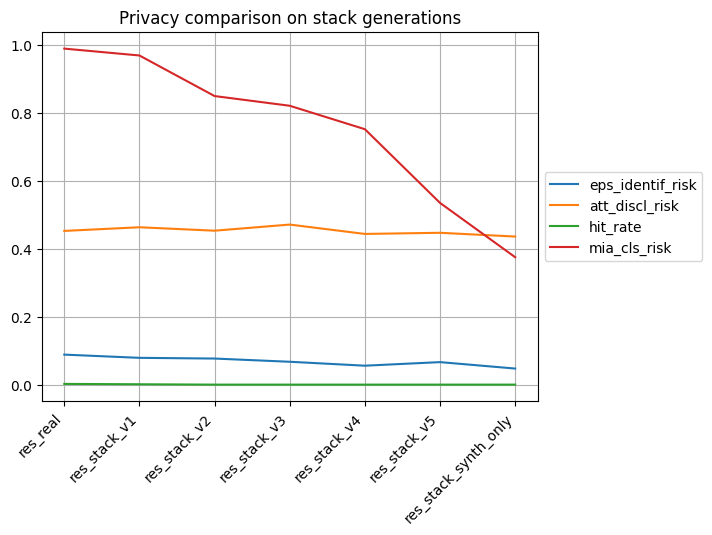

In [20]:
privacy_plot.plot.line()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

DCR_plot

,median_DCR
res_real,3.335017
res_stack_v1,3.872098
res_stack_v2,4.029656
res_stack_v3,3.767344
res_stack_v4,4.308419
res_stack_v5,4.363951
res_stack_synth_only,4.836810


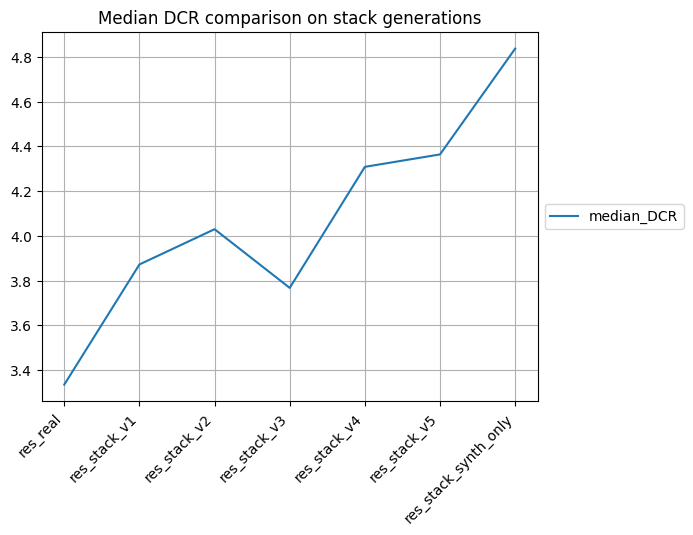

In [22]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.029163,0.014961,0.078872
res_stack_v1,0.019667,0.019545,0.086168
res_stack_v2,0.038468,0.043050,0.041300
res_stack_v3,0.056085,0.037592,0.059304
res_stack_v4,0.047079,0.047535,0.163922
res_stack_v5,0.048460,0.047871,0.096499
res_stack_synth_only,0.056961,0.058977,0.181648


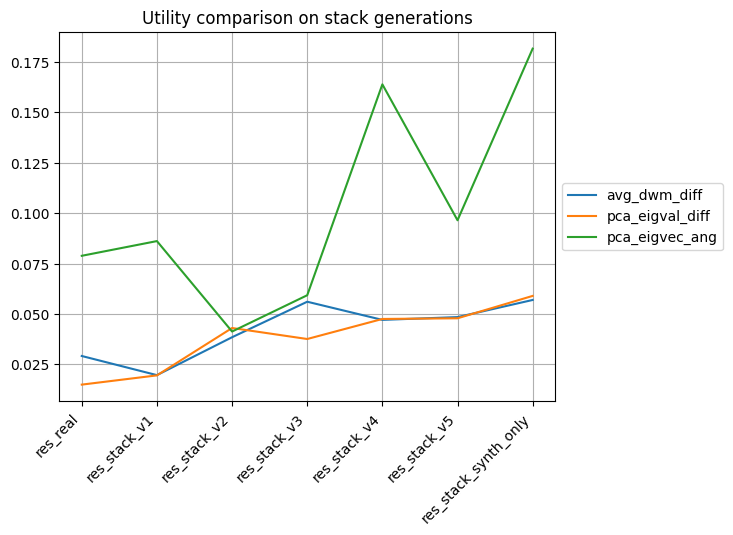

In [24]:
utility_plot.plot.line()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.329372,0.376382
res_stack_v1,0.471335,0.457063
res_stack_v2,0.567812,0.541105
res_stack_v3,0.500334,0.603906
res_stack_v4,0.619611,0.580611
res_stack_v5,0.590880,0.693182
res_stack_synth_only,0.669011,0.682954


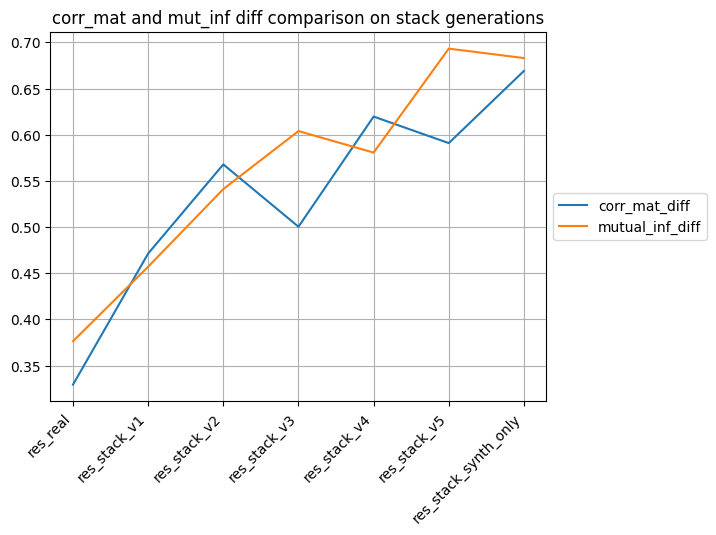

In [26]:
matrix_diff_plot.plot.line()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.029163,0.014961,0.078872,0.000000,0.329372,0.376382,0.076843,0.500000,0.014817,0.018127,...,-0.022779,0.843592,-0.143242,0.055929,0.035714,0.011887,0.002101,0.088235,0.988235,0.452101
res_stack_v1,0.019667,0.019545,0.086168,0.175212,0.471335,0.457063,0.092268,0.916667,0.029552,0.015867,...,0.011587,0.830462,-0.169888,0.072739,0.048319,0.003326,0.001050,0.078782,0.968067,0.462815
res_stack_v2,0.038468,0.043050,0.041300,0.000000,0.567812,0.541105,0.099213,0.583333,0.015314,0.033667,...,0.006492,0.854097,-0.194503,0.071962,0.034664,0.000164,0.000000,0.076681,0.848739,0.452731
res_stack_v3,0.056085,0.037592,0.059304,0.000000,0.500334,0.603906,0.144574,0.750000,0.027924,0.065643,...,-0.012088,0.860924,-0.222479,0.090321,0.043067,0.000218,0.000000,0.067227,0.820168,0.470728
res_stack_v4,0.047079,0.047535,0.163922,0.000000,0.619611,0.580611,0.134102,0.666667,0.019357,0.045440,...,0.014406,0.871113,-0.189951,0.102695,0.012605,0.002126,0.000000,0.055672,0.751261,0.443207
res_stack_v5,0.048460,0.047871,0.096499,0.209486,0.590880,0.693182,0.146577,0.666667,0.024922,0.044838,...,-0.004801,0.852941,-0.119888,0.086160,0.042017,0.002508,0.000000,0.066176,0.534454,0.446569
res_stack_synth_only,0.056961,0.058977,0.181648,0.153298,0.669011,0.682954,0.130988,0.833333,0.029019,0.070188,...,0.002954,0.890756,-0.155812,0.115521,0.072479,0.000545,0.000000,0.047269,0.374790,0.435504


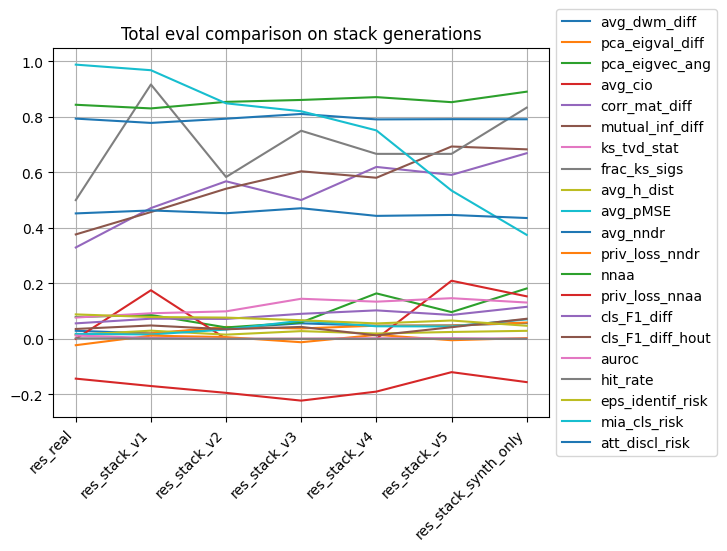

In [28]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [29]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.807771,0.761806
1,res_stack_v1,0.788407,0.760641
2,res_stack_v2,0.792509,0.776701
3,res_stack_v3,0.763651,0.777084
4,res_stack_v4,0.774614,0.791995
5,res_stack_v5,0.790131,0.827434
6,res_stack_synth_only,0.757547,0.846854


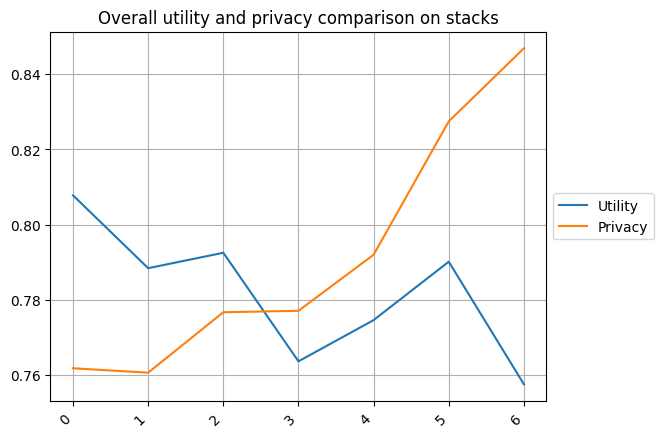

In [30]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()